https://stackoverflow.com/questions/65069624/networkx-cluster-nodes-in-a-circular-formation-based-on-node-color

https://stackoverflow.com/questions/61425817/force-nodes-positions-on-concentric-circles-in-graphviz-graph

In [60]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime
import time
from tqdm.notebook import tqdm,trange
import re
import warnings
import json
warnings.filterwarnings("ignore") 
logging.getLogger('matplotlib.font_manager').disabled = True

# Load 3 people lists and unique people

In [84]:
with open('gorvenment_people_list.txt') as f:
    gorvenment_people_list = f.read().splitlines()
for i in range(len(gorvenment_people_list)):
    gorvenment_people_list[i] = eval(gorvenment_people_list[i])

In [62]:
with open('commissioner_dict.json', 'r') as f:
    commissioner_dict = json.load(f)
with open('cra_dict.json', 'r') as f:
    cra_dict = json.load(f)
cra_list = []
for v in cra_dict.values():
    cra_list += v
commissioner_list = []
for v in commissioner_dict.values():
    commissioner_list += v
target_people_list = cra_list + commissioner_list

In [63]:
len(target_people_list)

129

In [64]:
with open('unique_people.txt', encoding = 'utf-8') as f:
    unique_people = f.read().splitlines()

# read in emails

In [65]:
df_email = pd.read_csv('output_attr_stats.csv')
from_list = df_email['From'].values.tolist()
to_list = df_email['To'].values.tolist()
cc_list = df_email['CC'].values.tolist()

In [66]:
num_people = len(unique_people)
name2id, id2name = nameToIndexDict(unique_people)

In [67]:
cra_idx_list = []
for i,people in enumerate(unique_people):
    if people in cra_list:
        cra_idx_list.append(i)
len(cra_idx_list)

54

In [68]:
commissioner_idx_list = []
for i,people in enumerate(unique_people):
    if people in commissioner_list:
        commissioner_idx_list.append(i)
len(commissioner_idx_list)

74

In [69]:
total_idx_list = cra_idx_list + commissioner_idx_list

In [72]:
num_TO = []
num_CC = []
num_TO_CC = []
for i in range(len(to_list)):
    num_TO.append(len(to_list[i]))
    num_CC.append(len(cc_list[i]))
    num_TO_CC.append(len(to_list[i]) + len(cc_list[i]))
df_email['num_TO'] = num_TO
df_email['num_CC'] = num_CC
df_email['num_TO_CC'] = num_TO_CC

In [73]:
# seperate emails by sent time
date_email = pd.to_datetime(df_email['date_sent'])
idxt1 = date_email>datetime(2014,1,23)
idxt2 = date_email>datetime(2014,5,14)
idxt3 = date_email>datetime(2016,2,24)
idxe1 = np.array(idxt1==False)
idxe2 = np.array((idxt1==True) & (idxt2==False))
idxe3 = np.array((idxt2==True) & (idxt3==False))
idxe4 = np.array(idxt3==True)

idxes = [idxe1, idxe2, idxe3, idxe4]
stage_labels = ['before 2014,1,23', '2014,1,23 - 2014,5,14', '2014,5,14 - 2016,2,24', 'after 2016,2,24']

In [74]:
df_email[date_email.dt.year == 2010]

filenm  \
7747   22920_fn_34-2-ScottMaddox2_ln_90265.txt   
14690  22905_fn_34-2-ScottMaddox2_ln_89751.txt   
26031  22909_fn_34-2-ScottMaddox2_ln_89882.txt   

                                     From                            Sent  \
7747          roberthenley@embarqmail.com  Friday, April 02, 2010 5:17 PM   
14690  mailto:roberthenley@embarqmail.com  Friday, April 02, 2010 5:17 PM   
26031         roberthenley@embarqmail.com  Friday, April 02, 2010 5:17 PM   

                 To           CC  Bcc                    Subject Attachments  \
7747        invalid  invalid_nan  NaN  Lesson in Poor Leadership         NaN   
14690  michellebono  invalid_nan  NaN  Lesson in Poor Leadership         NaN   
26031  michellebono  invalid_nan  NaN  Lesson in Poor Leadership         NaN   

      Importance  isThread  ...  body_len  \
7747         NaN     False  ...       903   
14690        NaN     False  ...       906   
26031        NaN     False  ...       903   

                                                    body  mn_nb_words  \
7747   Ms. Bono, Please forward this e-mail, in its e...        104.8   
14690  Ms. Bono, Is Please forward this e-mail, in it...        150.0   
26031  Ms. Bono, Please forward this e-mail, in its e...        104.8   

       std_nb_words mn_nb_chars  std_nb_chars email_count num_TO num_CC  \
7747      42.874235       614.6    148.353632           5      7     11   
14690           NaN       757.0           NaN           1     12     11   
26031     42.874235       614.6    148.353632           5     12     11   

       num_TO_CC  
7747          18  
14690         23  
26031         23  

[3 rows x 31 columns]

In [75]:
invalid_nodes = []
invalid_node_idxs = []
for i,people in enumerate(unique_people):
    if 'invalid' in people:
        invalid_nodes.append(people)
        invalid_node_idxs.append(i)
invalid_nodes, invalid_node_idxs

(['invalid', 'invalid_nan'], [10111, 10112])

# plot whole network without combine (march 24 2022)

  0%|          | 0/4 [00:00<?, ?it/s]

t1 0.15863919258117676
matrix done, time: 9.443727254867554
seperated people by position, time: 9.691782474517822
Done adding edges and nodes: 13.13727068901062
Done plotting: 21.267837524414062
t1 21.450878381729126
matrix done, time: 30.87647294998169
seperated people by position, time: 31.125529527664185
Done adding edges and nodes: 34.453389406204224
Done plotting: 42.343873739242554
t1 42.58792805671692
matrix done, time: 51.95392417907715
seperated people by position, time: 52.19797873497009
Done adding edges and nodes: 55.63793659210205
Done plotting: 63.54996633529663
t1 63.81602621078491
matrix done, time: 72.99689793586731
seperated people by position, time: 73.24095249176025
Done adding edges and nodes: 76.57930016517639
Done plotting: 84.55175542831421


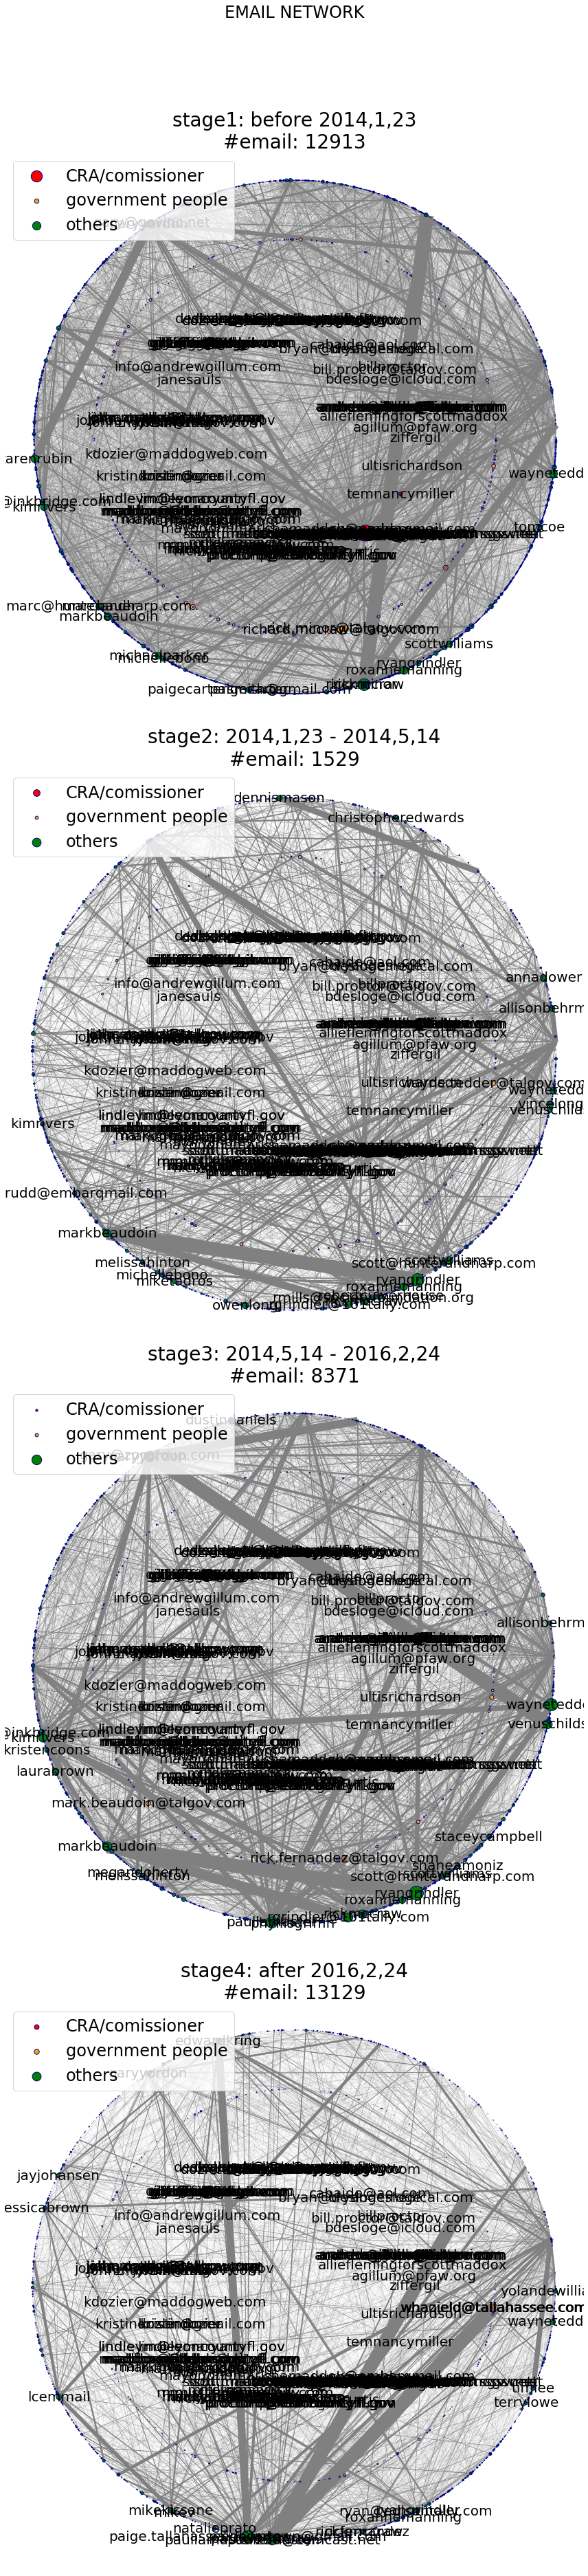

In [76]:
# 
fig = plt.figure(figsize=(12,50))
fig.suptitle('EMAIL NETWORK',fontsize = 24, y=1.04)
start_time = time.time()
# fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')
for k in trange(4):
    # build adjmat
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
#     adj_email_mat1 = np.zeros((len(unique_people),len(unique_people)))
    email_adj_mat = np.zeros((len(unique_people),len(unique_people)))

    temp_from_list = df_temp['From'].values.tolist()
    temp_to_list = df_temp['To'].values.tolist()
    temp_cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()

    for i in range(len(temp_from_list)):
        if not pd.isnull(temp_from_list[i]):
            s = name2id[temp_from_list[i]] # id of the sender

            if not pd.isnull(temp_to_list[i]):
                rs = temp_to_list[i].split(';')
                for j in range(len(rs)):
                    r = name2id[rs[j]]  # id of the receiver
                    email_adj_mat[s,r] += 1/(num_TO_CC[i])
#                     email_adj_mat[s,r] += 1
            if not pd.isnull(temp_cc_list[i]):
                cs = temp_cc_list[i].split(';')
                for j in range(len(cs)):
                    r = name2id[cs[j]]  # id of the receiver
                    email_adj_mat[s,r] += 1/(num_TO_CC[i])
#                     email_adj_mat[s,r] += 1
        
    print('t1', time.time()-start_time)
    
    for invalid_node_idx in invalid_node_idxs:
        email_adj_mat[invalid_node_idx,:] = 0.
        email_adj_mat[:,invalid_node_idx] = 0.
    
#     adj_email_mat1 = adj_email_mat1 + adj_email_mat1.T
    email_adj_mat = email_adj_mat + email_adj_mat.T
    
#     adj_email_mat1 = np.triu(adj_email_mat1, 1)
    email_adj_mat = np.triu(email_adj_mat, 1)
        
    email_adj_mat = email_adj_mat/email_adj_mat.max()
    
    print('matrix done, time:', time.time()-start_time)
#     adj_mat = adj_email_mat2
        
    plt.subplot(4,1,k+1)
    nodes = unique_people

    G = nx.Graph()
#     G.add_nodes_from(nodes)
    networks = [1,2,3]

    networks_list = []
    for i in range(len(unique_people)):
        if i in total_idx_list:
            networks_list.append(1)
        elif i in government_idx_list:
            networks_list.append(2)
        else:
            networks_list.append(3)
    print('seperated people by position, time:', time.time()-start_time)
        
    # map color
    node_network_map = dict(zip(nodes, networks_list))
    colors = ['red', 'orange', 'green']
    color_map = dict(zip(networks, colors))

#     mat = adj_email_mat2 # selecting the matrix use for plot
    
    # build graph from numpy array 
    G = nx.from_numpy_array(email_adj_mat, create_using=nx.Graph)
    G = nx.relabel_nodes(G, id2name)   # relabel the node with corresponding names

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}
    print('Done adding edges and nodes:', time.time()-start_time)
    
    pos = nx.circular_layout(G) # calculate position
    radii = [6,10,13]  # set the diameter for the three circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles
    
    # calculate edge width
    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(email_adj_mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = 20*edge_width
    
    # calculate node size
    node_size = email_adj_mat.sum(axis=0)
    node_size = 100*node_size
    
    # select several most active people and label their names
    labeling_idx = node_size.argsort()[-25:][::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        labels[node] = node
    for node,group in node_network_map.items():
        if group == 1:
            labels[node] = node

    node_sizes = {}
    node_sizes['red'] = node_size[total_idx_list]
    node_sizes['orange'] = node_size[government_idx_list]
    node_sizes['green'] = node_size[[item for item in np.arange(len(unique_people)) if item not in (total_idx_list+government_idx_list)]]

    
    legend_labels = {'red': 'CRA/comissioner','orange': 'government people','green': 'others' }
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

    nx.draw_networkx_edges(G, pos=pos, width=edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=20, font_color='black')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 28)
    plt.legend(fontsize = 24, loc=2)
    plt.axis('off')
    print('Done plotting:', time.time()-start_time)
    
    # free memory, otherwise it will crash because of unsuffient memory
    email_adj_mat = None
    
plt.tight_layout()
# plt.savefig('Email_network3.png')
plt.show()


# combine nodes that belong to the same person

In [77]:
# cra
idx = 0
for k in cra_dict:
    for i in range(len(cra_dict[k])):
        cra_dict[k][i] = idx
        idx += 1
# commissioner
idx = 0
for k in commissioner_dict:
    for i in range(len(commissioner_dict[k])):
        commissioner_dict[k][i] = idx
        idx += 1
nodes_to_add = list(cra_dict.keys()) + list(commissioner_dict.keys())


In [78]:
num_people = len(unique_people)
idx_mapping = {}
cra_idx_list_new = []
for person,idx_list in cra_dict.items():
    global_indices = []
    for idx in idx_list:
        global_idx = unique_people.index(cra_list[idx])
        global_indices.append(global_idx)
    idx_mapping[num_people] = global_indices
    num_people +=1
    cra_idx_list_new.append(num_people) 
commissioner_idx_list_new = []
for person,idx_list in commissioner_dict.items():
    global_indices = []
    for idx in idx_list:
        global_idx = unique_people.index(commissioner_list[idx])
        global_indices.append(global_idx)
    idx_mapping[num_people] = global_indices
    num_people +=1 
    commissioner_idx_list_new.append(num_people) 
    

total_idx_list_new = cra_idx_list_new + commissioner_idx_list_new
total_idx_list_new = np.array(total_idx_list_new) - len(total_idx_list) - 1
total_idx_list_new = total_idx_list_new.tolist()
cra_idx_list_new = total_idx_list_new[:len(cra_idx_list_new)]
commissioner_idx_list_new = total_idx_list_new[len(cra_idx_list_new):]

  0%|          | 0/4 [00:00<?, ?it/s]

t1 0.14603257179260254
matrix done, time: 9.429698944091797
nodes combined, time: 42.901230812072754
government_idx_list updated, time: 44.179516315460205
nodes switched, time: 44.2105233669281
seperated people by position, time: 44.2823166847229
Done adding edges and nodes: 66.22201776504517
Done plotting: 70.71602392196655
t1 70.90162658691406
matrix done, time: 80.2475745677948
nodes combined, time: 113.32934045791626
government_idx_list updated, time: 114.616628408432
nodes switched, time: 114.65163731575012
seperated people by position, time: 114.72165203094482
Done adding edges and nodes: 136.52697134017944
Done plotting: 140.63689160346985
t1 140.88764667510986
matrix done, time: 150.18500995635986
nodes combined, time: 183.70231556892395
government_idx_list updated, time: 184.99260449409485
nodes switched, time: 185.02661275863647
seperated people by position, time: 185.09862899780273
Done adding edges and nodes: 206.9851975440979
Done plotting: 211.14936923980713
t1 211.410426

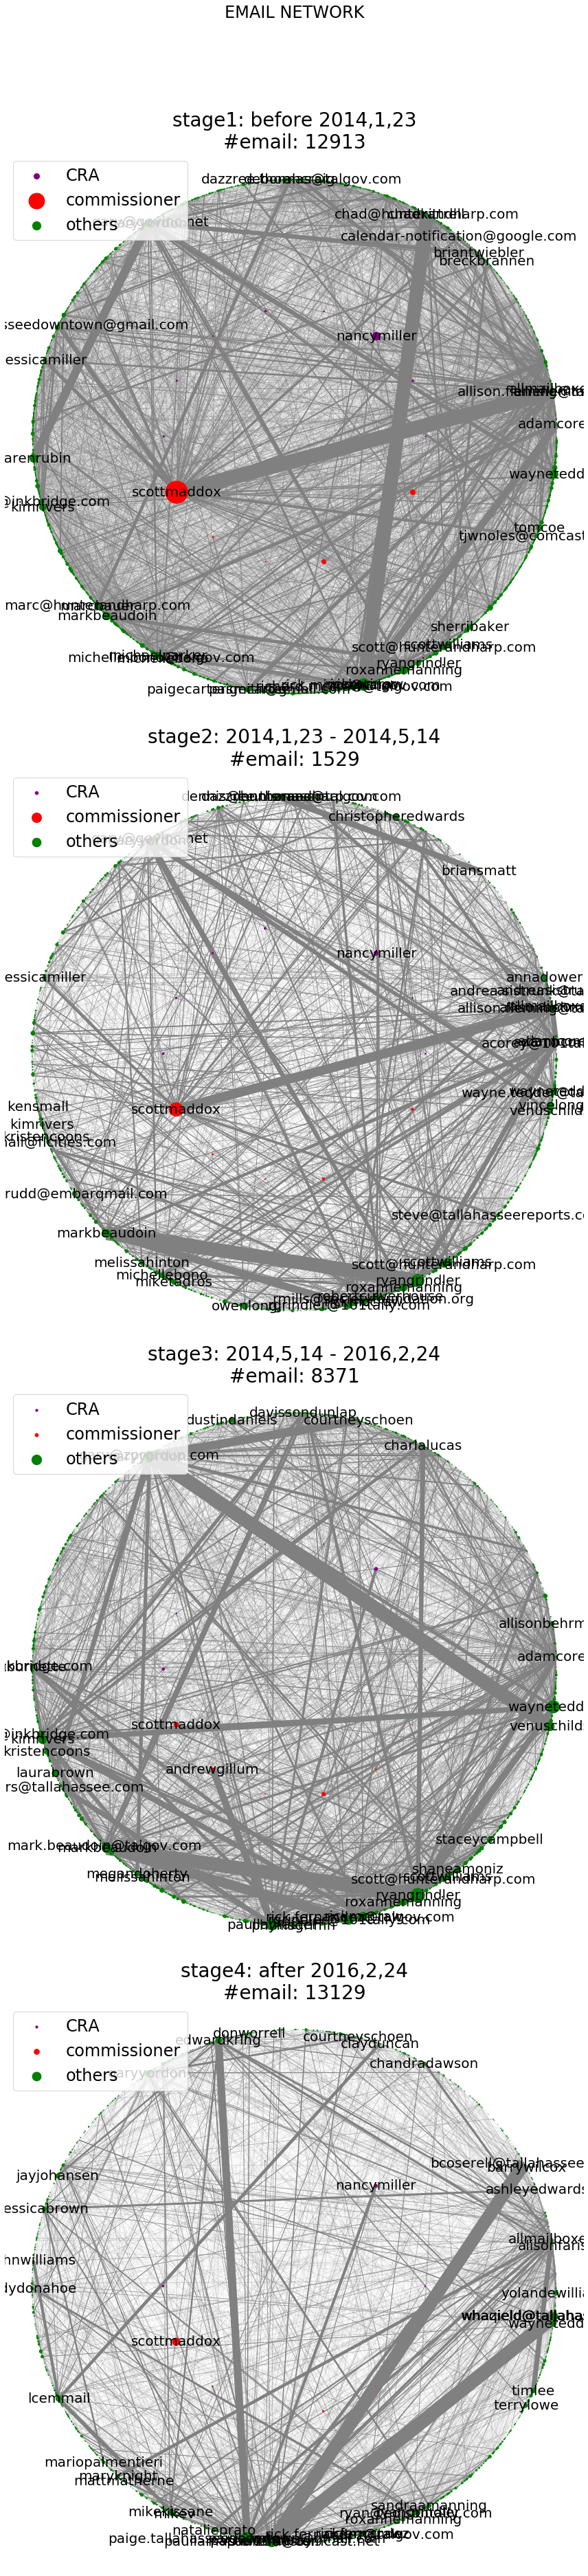

In [79]:
# 
adj_email_mat2 = None
normalizing_factors = []

fig = plt.figure(figsize=(12,50))
fig.suptitle('EMAIL NETWORK',fontsize = 24, y=1.04)
start_time = time.time()
# fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')
for k in trange(4):
    # build adjmat
    df_temp = df_email.iloc[idxes[k]]
    num_email = len(df_temp)
#     adj_email_mat1 = np.zeros((len(unique_people),len(unique_people)))
    adj_email_mat2 = np.zeros((len(unique_people),len(unique_people)))

    temp_from_list = df_temp['From'].values.tolist()
    temp_to_list = df_temp['To'].values.tolist()
    temp_cc_list = df_temp['CC'].values.tolist()
    num_TO_CC = df_temp['num_TO_CC'].values.tolist()

    for i in range(len(temp_from_list)):
        if not pd.isnull(temp_from_list[i]):
            s = name2id[temp_from_list[i]] # id of the sender

            if not pd.isnull(temp_to_list[i]):
                rs = temp_to_list[i].split(';')
                for j in range(len(rs)):
                    r = name2id[rs[j]]  # id of the receiver
                    adj_email_mat2[s,r] += 1/(num_TO_CC[i])
#                     email_adj_mat[s,r] += 1
            if not pd.isnull(temp_cc_list[i]):
                cs = temp_cc_list[i].split(';')
                for j in range(len(cs)):
                    r = name2id[cs[j]]  # id of the receiver
                    adj_email_mat2[s,r] += 1/(num_TO_CC[i])
#                     email_adj_mat[s,r] += 1
    print('t1', time.time()-start_time)
    
    for invalid_node_idx in invalid_node_idxs:
        adj_email_mat2[invalid_node_idx,:] = 0.
        adj_email_mat2[:,invalid_node_idx] = 0.
#     adj_email_mat1 = adj_email_mat1 + adj_email_mat1.T
    adj_email_mat2 = adj_email_mat2 + adj_email_mat2.T
    
#     adj_email_mat1 = np.triu(adj_email_mat1, 1)
    adj_email_mat2 = np.triu(adj_email_mat2, 1)
        
    adj_email_mat2 = adj_email_mat2/adj_email_mat2.max()
    
    normalizing_factors.append(adj_email_mat2.max()) # save it for later use
    
    print('matrix done, time:', time.time()-start_time)
    
    unique_people_combined = unique_people.copy()
    size1 = adj_email_mat2.shape[0]
    size2 = size1 + len(idx_mapping)
    idx_to_remove = []
    for _,v in idx_mapping.items():
        new_r = np.zeros(size1)
        for r_idx in v:
            new_r += adj_email_mat2[r_idx,:]
            idx_to_remove.append(r_idx)
        adj_email_mat2 = np.vstack((adj_email_mat2,new_r))

    for _,v in idx_mapping.items():
        new_c = np.zeros(size2)
        for c_idx in v:
            new_c += adj_email_mat2[:,c_idx]
        adj_email_mat2 = np.hstack((adj_email_mat2,new_c.reshape(-1,1)))
    
    adj_email_mat2 = np.delete(adj_email_mat2, idx_to_remove, axis=0)
    adj_email_mat2 = np.delete(adj_email_mat2, idx_to_remove, axis=1)
    
    unique_people_combined = np.array(unique_people_combined)
    unique_people_combined = np.delete(unique_people_combined, idx_to_remove, axis=0)
    unique_people_combined = unique_people_combined.tolist()
#     unique_people_combined = standardize_triplet(unique_people_combined)
    unique_people_combined += nodes_to_add
    
#     adj_email_mat2, unique_people_combined = combine_nodes(adj_email_mat2, idx_mapping, unique_people, nodes_to_add)
    
    print('nodes combined, time:', time.time()-start_time)
    
    government_idx_list_new = []
    for i,people in enumerate(unique_people_combined):
        for j,people2 in enumerate(gorvenment_people_list):
            first = people2[0]
            last = people2[1]
            email = people2[2]
            if people == email or people == first+last \
                or 'talgov.com' in people or 'leoncountyfl.gov' in people or 'tallahassee.com' in people:
                if i not in cra_idx_list and i not in commissioner_idx_list :
                    government_idx_list.append(i)
                    break
    print('government_idx_list updated, time:', time.time()-start_time)
    
    government_idx_list_new2 = government_idx_list_new.copy()
    total_idx_list_new2 = total_idx_list_new.copy()
    new_idx = np.linspace(0,len(unique_people_combined),len(total_idx_list_new)+1, dtype = int)[:-1]
    for i in range(len(total_idx_list_new2)):
        p1_idx = total_idx_list_new2[i]
        p1 = unique_people_combined[p1_idx]
        p2_idx = new_idx[i]
        p2 = unique_people_combined[p2_idx]
        unique_people_combined[p1_idx], unique_people_combined[p2_idx] = p2, p1
        adj_email_mat2[:,[p1_idx, p2_idx]] = adj_email_mat2[:,[p2_idx, p1_idx]]
        adj_email_mat2[[p1_idx, p2_idx],:] = adj_email_mat2[[p2_idx, p1_idx],:]
        
        if p2_idx in government_idx_list_new2:
            total_idx_list_new2[i], government_idx_list_new2[government_idx_list_new.index(p2_idx)] = p2_idx, p1_idx
        else:
            total_idx_list_new2[i] = p2_idx

#     name2id, id2name = nameToIndexDict(unique_people)

    cra_idx_list_new2 = total_idx_list_new2[:len(cra_idx_list_new)]
    commissioner_idx_list_new2 = total_idx_list_new2[len(cra_idx_list_new):]
#     adj_email_mat2, unique_people_combined2, total_idx_list_new2, cra_idx_list_new2, commissioner_idx_list_new2, government_idx_list_new2 = switch_index(adj_email_mat2, unique_people_combined, total_idx_list_new, cra_idx_list_new, commissioner_idx_list_new, government_idx_list_new)
    name2id_new2, id2name_new2 = nameToIndexDict(unique_people_combined)
    
    print('nodes switched, time:', time.time()-start_time)
    
    plt.subplot(4,1,k+1)
#     nodes = unique_people_combined

    G = nx.Graph()
#     G.add_nodes_from(nodes)
    networks = [1,2,3,4]

    networks_list = []
    for i in range(len(unique_people_combined)):
        if i in cra_idx_list_new2:
            networks_list.append(1)
        elif i in commissioner_idx_list_new2:
            networks_list.append(2)
        elif i in government_idx_list_new2:
            networks_list.append(3)
        else:
            networks_list.append(4)
    print('seperated people by position, time:', time.time()-start_time)
        
    # map color
    node_network_map = dict(zip(unique_people_combined, networks_list))
    colors = ['purple', 'red', 'orange', 'green']
    color_map = dict(zip(networks, colors))

    # build graph from numpy array 
    G = nx.from_numpy_array(adj_email_mat2, create_using=nx.Graph)
    G = nx.relabel_nodes(G, id2name_new2)   # relabel the node with corresponding names

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}
    print('Done adding edges and nodes:', time.time()-start_time)
    
    pos = nx.circular_layout(G) # calculate position
    radii = [5,8,10]  # set the diameter for the three circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['purple']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles
    
    # calculate edge width
    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_email_mat2[name2id_new2[s],name2id_new2[t]])
    edge_width = np.array(edge_width)
    edge_width = 20*edge_width
    
    # calculate node size
    node_size = adj_email_mat2.sum(axis=0)
    node_size = 100*node_size
    
    # select several most active people and label their names
    labeling_idx = node_size.argsort()[-25:][::-1].tolist()
    
    # select several strongest communication and label their nodes
    labeling_edge_idx = edge_width.argsort()[-25:][::-1]
    for i in labeling_edge_idx:
        labeling_idx.append(name2id_new2[list(G.edges())[i][0]])
        labeling_idx.append(name2id_new2[list(G.edges())[i][1]])
        
    labeling_idx = list(set(labeling_idx)) 
    labels = {}
    for i in labeling_idx:
        node = id2name_new2[i]
        labels[node] = node
        
    # label the name from cra and commissioner group
#     for node,group in node_network_map.items():
#         if group == 1 or group == 2:
#             labels[node] = node[0] + ' ' + node[1]

    node_sizes = {}
    node_sizes['red'] = node_size[commissioner_idx_list_new2]
    node_sizes['purple'] = node_size[cra_idx_list_new2]
    node_sizes['orange'] = node_size[government_idx_list_new2]
    node_sizes['green'] = node_size[[item for item in np.arange(len(unique_people_combined)) if item not in (total_idx_list_new2+government_idx_list_new2)]]

    
    legend_labels = {'red': 'commissioner', 'purple':'CRA','orange': 'government people','green': 'others' }
    for color, node_names in nodes_by_color.items():
        nx.draw_networkx_nodes(G, pos=pos, node_size=node_sizes[color], nodelist=node_names, node_color=color, label=legend_labels[color])

    nx.draw_networkx_edges(G, pos=pos, width=edge_width, edge_color = 'grey')
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=20, font_color='black')
    plt.title('stage'+str(k+1)+': '+stage_labels[k] + '\n#email: '+str(num_email),fontsize = 28)
    plt.legend(fontsize = 24, loc=2)
    plt.axis('off')
    print('Done plotting:', time.time()-start_time)
    
    # release memory, especially adj_email_mat2, otherwise it will crash
    adj_email_mat2 = None
#     unique_people_combined = None
#     unique_people_combined2 = None
#     adj_mat = None

plt.tight_layout()
plt.show()
